In [96]:
def check(g1, g2, y, x, eta):
    print(g1*(1-x+eta) + g2*(1+y-eta) - 1)
    print(2 + y - x, (g1+g2)/(g1*g2))


check(0.9, 0.54, 1.0, 0., 0.85)

1.286
3.0 2.962962962962963


C:\Users\hoedtke\AppData\Local\Temp/ipykernel_21384/2832891611.py:18: RuntimeWarning: divide by zero encountered in true_divide
  z = 2 + db > np.divide((aa1+aa2),aa1*aa2)
C:\Users\hoedtke\AppData\Local\Temp/ipykernel_21384/2832891611.py:18: RuntimeWarning: invalid value encountered in true_divide
  z = 2 + db > np.divide((aa1+aa2),aa1*aa2)
C:\Users\hoedtke\AppData\Local\Temp/ipykernel_21384/2832891611.py:20: UserWarning: The following kwargs were not used by contour: 'square'
  axis.contourf(aa1, aa2, z, cmap=cmap, square=True)


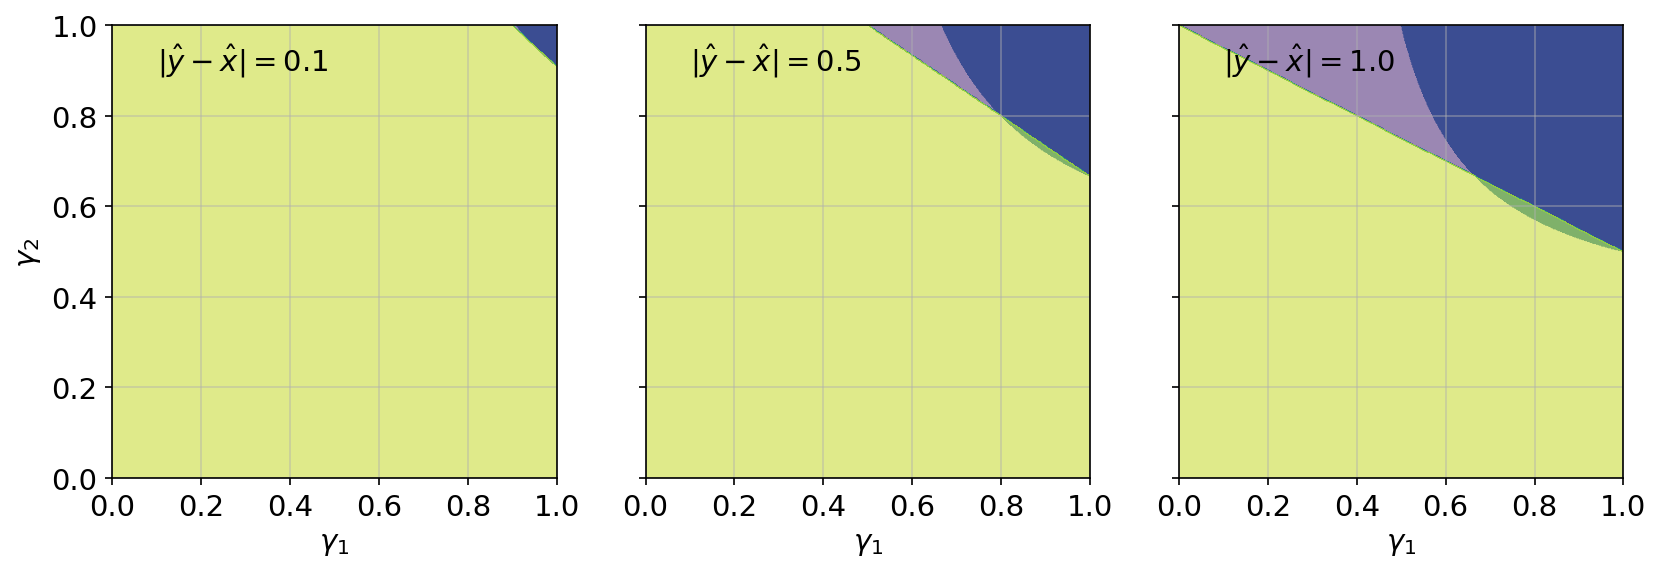

In [79]:
from matplotlib.colors import LinearSegmentedColormap
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

mpl.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(1, 3, figsize=(13,4), sharey=True)

cmap = LinearSegmentedColormap.from_list("", ["white", "tab:blue"])
dbs = (0.1, 0.5, 1.0)
for db, axis in zip(dbs, ax):
    
    a1 = np.linspace(0., 1, 500)
    a2 = np.linspace(0, 1, 500)
    
    aa1, aa2 = np.meshgrid(a1, a2)
    
    z = 2 + db > np.divide((aa1+aa2),aa1*aa2)
    
    axis.contourf(aa1, aa2, z, cmap=cmap, square=True)
    
    z2 = aa1 * (1 - 0 + .0) + aa2 * (1 + db - .0) - 1 < 1
    axis.contourf(aa1, aa2, z2, alpha=0.5)
    
    axis.grid(True, alpha=0.5)
    axis.text(0.1, 0.9, fr"$\|\hat{{y}} - \hat{{x}}\| = {db}$")
    axis.set_xlabel(r"$\gamma_1$")

ax[0].set_ylabel(r"$\gamma_2$")

plt.gcf().set_dpi(150)
plt.show()

In [17]:
import numpy as np


n = np.arange(1, 12, 2)
n = np.append(n, 1000)

for ni in n:
    print(f"For {ni} neighbours: ")
    
    n_loops = 50_000
    rr = [np.abs(np.random.rand(ni).mean() - np.random.rand(1)) for _ in range(n_loops)]
    print(f"\t mean: {np.mean(rr):.3f} +- {np.std(rr):.3f}")
    

For 1 neighbours: 
	 mean: 0.333 +- 0.236
For 3 neighbours: 
	 mean: 0.277 +- 0.184
For 5 neighbours: 
	 mean: 0.265 +- 0.170
For 7 neighbours: 
	 mean: 0.262 +- 0.163
For 9 neighbours: 
	 mean: 0.260 +- 0.160
For 11 neighbours: 
	 mean: 0.258 +- 0.156
For 1000 neighbours: 
	 mean: 0.251 +- 0.145


In [152]:
import numpy as np

n = np.append(n, 1000)

n = 8 
n_loops = 1_000_000
rr = np.array([np.abs(np.random.rand(n).mean() - np.random.rand(1)) for _ in range(n_loops)]).flatten()
rd = np.array([np.abs(np.random.rand(1) - np.random.rand(1)) for _ in range(n_loops)]).flatten()

In [151]:
ni

1000

(array([1.74265e+05, 1.74210e+05, 1.74105e+05, 1.68645e+05, 1.47662e+05,
        1.00459e+05, 4.63690e+04, 1.24300e+04, 1.75700e+03, 9.80000e+01]),
 array([4.46971609e-07, 8.72150146e-02, 1.74429582e-01, 2.61644150e-01,
        3.48858717e-01, 4.36073285e-01, 5.23287853e-01, 6.10502420e-01,
        6.97716988e-01, 7.84931556e-01, 8.72146123e-01]),
 <BarContainer object of 10 artists>)

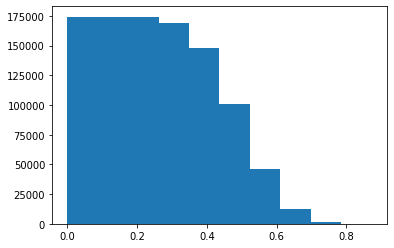

In [153]:
import matplotlib.pyplot as plt
plt.hist(rr)

(array([189152., 169955., 149278., 130058., 110126.,  90299.,  69923.,
         50340.,  30528.,  10341.]),
 array([3.17413882e-07, 9.98547236e-02, 1.99709130e-01, 2.99563536e-01,
        3.99417942e-01, 4.99272348e-01, 5.99126755e-01, 6.98981161e-01,
        7.98835567e-01, 8.98689973e-01, 9.98544379e-01]),
 <BarContainer object of 10 artists>)

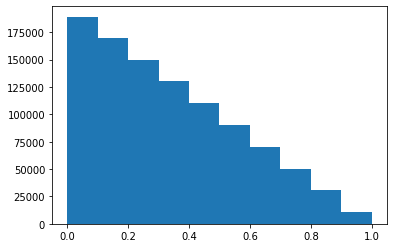

In [154]:
plt.hist(rd)

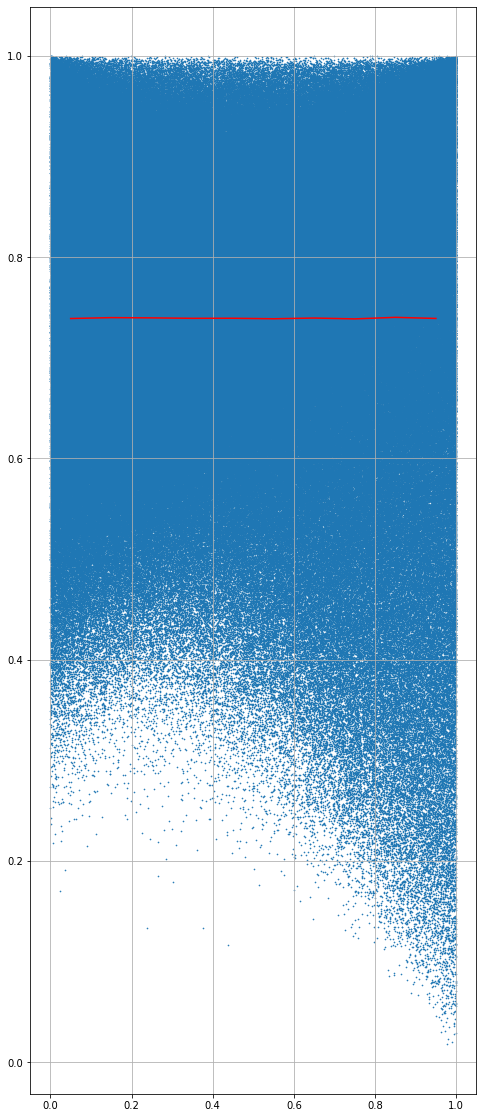

In [156]:
g = np.random.rand(n_loops)

def bin_mean(x, y, bins):
    bin_means = np.zeros(len(bins) - 1)
    for i in range(len(bins) - 1):
        idx = np.where((x >= bins[i]) & (x < bins[i+1]))[0]
        bin_means[i] = np.mean(y[idx])
    return bin_means

plt.figure(figsize=(8, 20))

#w1 = +(5472/3823)*(1-rd) - 9295/3823 + 2./(1-rd)
#w2 = -(5472/3823)*(1-rr) + 9295/3823
#w1 = +(2848/933)*(1-rd) - 3781/933 + 2./(1-rd)
#w2 = -(2848/933)*(1-rr) + 3781/933

a = -(21/64)
b = 85/64
#a = -(21/128)
#b = 149/128
#a = -(63/320)
#b = 383/320
a = -7 / 16
b = 23/16
w1 = a * (1-rd) + b
#w1 = 37.9432 * ((1-rd) - 0.837657)**2
#w1 = 0.025538 * ((1-rd) - 7.25758)**2
#a = 336/1775
#b = 1439/1775
w2 =1# a * (1-rr) + b
s = w1*g*(1-rd) + w2*(1-g)*(1-rr)

plt.scatter(g, s, s=0.4)

#bins = np.linspace(0, 1, 11)
means = bin_mean(g, s, bins)
plt.plot(bins[:-1]+0.05, means, c="red")

#rdm = bin_mean(g, rd, bins)
#rrm = bin_mean(g, rr, bins)
#w1 = a * (1-rdm) + b
#s = w1*bins[1:]*(1-rdm) + w2*(1-bins[:-1])*(1-rdm)
#plt.plot(bins, bins / bins * 0.7, c="green")
#plt.plot(bins[:-1], s, c="orange")
plt.grid(True)

In [62]:
(5472/3823)*1 - 9295/3823 + 2./1

1.0

In [58]:
w1 = +(5472/3823)*2/3 - 9295/3823 + 2./(2/3)
w1 *= 2/3
w1

1.015258522974976

In [59]:
w2 = -(5472/3823)*71/96 + 9295/3823
w2 *= 71/96
w2

1.0152585229749762

In [63]:
-(5472/3823)*1 + 9295/3823

1.0